# Machine Learning Tools for Predicting NBA Players Entering the Hall of Fame

##### Vickram N. Premakumar & Yuan-Chi Yang

## Introduction

The National Basketball Association (NBA) is the most prominent professional basketball league in the world. Earning a spot on an NBA team's roster is the aspiration of thousands of young players both in the United States and abroad. Among these great players, a tiny percentage of them are enshrined in the Naismith Memorial Basketball Hall of Fame (HOF), the highest career-spanning honor that can be awarded. 

In this work, we study the relationship between the player's career statistics and whether the player is inducted in the HOF. The selection criteria for the HOF are not made widely known, and it is rare that career-wide averages are cited as reasons for induction. Often, specific games and historic moments are used as examples of a Hall of Famer's greatness. A total of seven committees are formed to screen and select inductees, reflecting the complex decision making process at hand. Hence, the approach for a player who has the goal of entering the Hall of Fame is very opaque. Therefore, we specifically focus on what a player should prioritize with being inducted into HOF as the career goal. We can also use our models to predict which current players have a good chance of being enshrined in the HOF, assuming all careers end in 2015. 

In the following, we first discuss how we gather and prepare clean data for analysis. We then present the analysis, specifically on how we select the most prominent features and how we apply machine-learning models.

## Method

In this section, we first discuss how we gather the data used in this work and how we cleanse and prepare the data for analysis.

### Data gathering

We have gathered data from various sources online. First we downloaded the season-by-season player statistics data from kaggle. We then scraped list of Hall of Fame inductees and list of other seasonal awards (MVPs, All-Star Selections, Championships, etc.) from Wikipedia. For more detailed discussion, please see the notebook, 'data-gathering.ipynb'. 

### Data Preparation

To prepare clean data, we first clean the seasonal statistics data by deleting entries with duplicated information and replacing missing data by hand where possible, and dropping it otherwise. We then construct the players' career statistics based on the cleansed seasonal statistics data. We further append features such as Hall of Fame inductees and seasonal awards in the data. For detailed discussion, please see the notebooks, 'data-preparation.ipynb' and 'data-preparation-appending-awards.ipynb'.

## Results

In this section, we will present the analysis results. We first discuss how we select the most important features and use logistic regression as a tool of validation. We then show how we model the data with different machine learning models and the corresponding results. 

In order to achieve uniformity in our training dataset, we use players who started their careers after 1982 and ended their career before 2015. We then search for the optimal model to predict if the player is a Hall of Famer. We then apply the trained model to players whose careers ended after 2015 or who is still playing to predict who will be inducted into Hall of Fame based on available statistics to 2018.

### Feature Selection and Logistic Regression

First, we find that the features can be grouped based on correlations, for example, number of game played, 'G,' and number of starting game, 'GS,' are highly correlated and can be treated as one group. Then for each group, we find the representing features based on the correlations with the Hall of Famer, 'HOF.' We then sort the representing features based on the correlations with 'HOF,' which corresponding to the order of importance. The top five representing features are

|Representing Feature|Correlation with 'HOF'|
|---|---|
|'AllStar'|0.836601|
|'VORP'|0.616421|
|'WS'|0.553751|
|'AllStar_MVP'|0.506579|
|'First team'| 0.436193|

This table shows that the number of all star selections, 'AllStar,' has a very high correlation with 'HOF' comparing to other representing features.

#### Validation Through logistic regression

We then explore the performance of logistic repression models by using the representing features. Specifically, we search for the optimal models based on learning curves for selected features, and cross-valiation curve over number of representing features.

We first study the learning curves for the logistic regression models using only the most important representing feature, 'Allstar,' and two most important representing features, 'AllStar' and 'VORP.' Monitoring $F_1$ score, we find that the model with one representing feature has low bias and low variance, with training score saturating at around 0.88 and test score at around 0.87. The model with two representing features has lower bias but higher variance, with training score saturating at around 0.895 and test score at around 0.87. This difference in the two models suggests that the model with two representing features overfits the data in comparison to the model with ony one representing feature.

Learning Curve For 'AllStar'
![Learning Curve For 'AllStar'](./figures/feature-selection-logistic-regression/learn-curve-one-rep-feature.png)

Learning Curve For 'AllStar' and 'VORP'
![Learning Curve For 'AllStar' and 'VORP'](./figures/feature-selection-logistic-regression/learn-curve-two-rep-feature.png)

We next plot the cross-validation curve over the number of representing features, aiming at finding the optimal number of representing features. As expected, the optimal model is using only one representing feature, 'AllStar.'
![Cross Validation](./figures/feature-selection-logistic-regression/cross-validation-number-of-features.png)

### Logistic Regression Results

We now present the results with logistic regression models using only one representing feature, 'AllStar,' and two representing features, 'AllStar' and 'VORP.'

####  Logistic Regression Model Using 'AllStar'

We first plot the distribution of 'AllStar' for Hall of Famers and others. According to the figure, a good boundary could be between 'AllStar'=5 and 'AllStar'=6. We also note that the Hall of Famer who have never attended any all star games is Arvydas Sabonis, who is inducted in recognition of his achievement in international competition rather than outstanding NBA career. As a outlier, we later on drop this data point.
![Distribution](./figures/feature-selection-logistic-regression/distribution-one-rep-feature.png)

Training the data using the whole working data set make the following predition on the probability of being inducted into Hall of Fame based on the number of all star games attended:
![Probability](./figures/feature-selection-logistic-regression/probability-one-rep-feature.png)
which basically predicts that players who have attended at least six all star games will be inducted.
The performance of this model as well as the prediction on players who finished their career after 2015 or current players will be presented with the results by the model using two representing features.

####  Logistic Regression Model Using 'AllStar' and 'VORP'

We first plot the distribution of 'AllStar' and 'VORP' for Hall of Famers and others. According to the figure, a line connecting ('AllStar','VORP') = (5,60) and (6,0) seems to be a good boundary. We again note that Arvydas Sabonis is an outlier and will be droped for model training.
![Distribution](./figures/feature-selection-logistic-regression/distribution-two-rep-feature.png)

Training the data using the whole working data set determine the following boundary line:
![Probability](./figures/feature-selection-logistic-regression/classification-two-rep-feature.png)
The performance of this model as well as the prediction on players who finished their career after 2015 or current players will be presented in the next subsubsection.

#### Results

We now present the performance of the two models by using precision, recall, and F1 score.

|Model|Precision|Recall|F1|
|---|---|---|---|
|'AllStar'|0.926|0.862|0.893|
|'AllStar' and 'VORP'|0.929|0.897|0.912|

This table shows that the perfomance of the model using two representing features is slightly better.

We also explore the quality of the fitting by using package 'statsmodels.' For model using only 'AllStar'

|Feature|Coefficient|p-value|
|---|---|---|
|'AllStar|1.948|0.000|

For model using 'AllStar' and 'VORP'

|Feature|Coefficient|p-value|
|---|---|---|
|'AllStar|1.804|0.000|
|'VORP'|0.352|0.275|

where 'VORP' doesn't reach statistic significance. This suggests that the model using the two representing features might overfit the data. Though increasing number of data might improve the results, gathering more data is slow, limited by the number of NBA players each season. 

We now show prediction on the players who finished career after 2015 or who is still playing. Specifically, we show the players' names and the probabilities of being inducted by the two models, and sort the results by the probability predicted by models with two features:

|Player|Probability using 'AllStar'|Probability using 'AllStar' and 'VORP'|
|---|---|---|
|Kobe Bryant|0.999944|0.999943|
|Kevin Garnett|0.999419|0.999658|
|Tim Duncan|0.999419|0.999628|
|LeBron James|0.998733|0.999521|
|Dirk Nowitzki|0.997238|0.997610|
|Dwyane Wade|0.993990|0.994365|
|Chris Bosh|0.986971|0.980391|
|Paul Pierce|0.971987|0.977831|
|Chris Paul|0.940801|0.962368|
|Carmelo Anthony|0.971987|0.961662|
|Kevin Durant|0.940801|0.943087|
|Vince Carter|0.879214|0.902361|
|Dwight Howard|0.879214|0.874906|
|Russell Westbrook|0.769268|0.800773|
|Joe Johnson|0.769268|0.732703|
|Pau Gasol|0.604286|0.683180|
|James Harden|0.604286|0.633249|
|Tony Parker|0.604286|0.572100|
|LaMarcus Aldridge|0.604286|0.551259|
|Amar'e Stoudemire|0.604286|0.526281|

Though the predicted probabilities for the two models on the same player have slightly different values, there is no player who is predicted to be inducted by only one model. That is, the two predicted class boundary classify these players in the same way:
![Prediction](./figures/feature-selection-logistic-regression/prediction-two-rep-feature.png)
where the boundary between the brown (predicted HOFer) and light blue (predicted not HOFer) is the class boundary predicted by the model using 'AllStar' and 'VORP,' and the gray dashed line is the class boundary predicted by the model using only 'AllStar.'

We also explore the players who, based on our impression, have high changes to be inducted into Hall of Fame, but are not predicted with probability over 50%. 

|Player|'AllStar'|'VORP'|Probability using 'AllStar'|Probability using 'AllStar' and 'VORP'|
|---|---|---|---|---|
|Stephen Curry|5|41.8|0.411572|0.456286|
|Al Horford|5|27.2|0.411572|0.393452|
|Blake Griffin|5|25.6|0.411572|0.386738|
|Kevin Love|5|23.5|0.411572|0.377991|
|Paul George|5|21.2|0.411572|0.368501|
|John Wall|5|20.3|0.411572|0.364814|
|Anthony Davis|5|17.8|0.411572|0.354658|
|Kyrie Irving|5|16.3|0.411572|0.348626|
|Rajon Rondo|4|21.9|0.242633|0.222777|
|Klay Thompson|4|9.6|0.242633|0.187474|

We believe if these players maintain their current performance for the rest of their career, they are very likely to be inducted into Hall of Fame. We also note that Stephen Curry, Paul George, and Kyrie Irving have just attended all star game in 2019, which makes their 'AllStar' features six. Including this information, they are predicted to be Hall of Famers:

|Player|'AllStar'|'VORP'|Probability using 'AllStar'|Probability using 'AllStar' and 'VORP'|
|---|---|---|---|---|
|Stephen Curry|6|41.8|0.604286|0.633659|
|Paul George|6|21.2|0.604286|0.546018|
|Kyrie Irving|6|16.3|0.604286|0.524521|


## Other Machine Learning Models

In this section, we present the results using other machine learning models, specifically Naive Bayes and Neural Network. We again explore the model based on only one representing feature, 'AllStar,' and the model using two representing features, 'AllStar' and 'VORP.' 

### Naive Bayes

Similar to logistic regression, we use players who started their careers after 1982 and ended their career before 2015 as the working data set, searhcing for the optimal model to predict if the player is a Hall of Famer. We then apply the trained model to players whose careers ended after 2015 or who is still playing to predict who will be inducted into Hall of Fame based on available statistics to 2018.

####   'AllStar'

Training the data using the whole working data set make the following predition on the probability of being inducted into Hall of Fame based on the number of all star games attended:
![Probability](./figures/naive-bayes/probability-one-rep-feature.png)
which basically predict that players who have attended at least two all star games will be inducted. This is very different from logistic regression. The performance is also much worse:

|Model|Precision|Recall|F1|
|---|---|---|---|
|'AllStar'|0.500|0.933|0.651|

Though the recall is high, the class boundary is too over to the 'HOF'=0 side, rendering low precision.  


This model predicts that the following players will be inducted into Hall of Fame:
Al Horford, Amar'e Stoudemire, Anthony Davis, Blake Griffin, Carmelo Anthony, Chris Bosh, Chris Paul, Damian Lillard, DeMar DeRozan, DeMarcus Cousins, Deron Williams, Derrick Rose, Dirk Nowitzki, Draymond Green, Dwight Howard, Dwyane Wade, James Harden, Jimmy Butler, Joe Johnson, John Wall, Kevin Durant, Kevin Garnett, Kevin Love, Klay Thompson, Kobe Bryant, Kyle Lowry, Kyrie Irving, LaMarcus Aldridge, LeBron James, Marc Gasol, Pau Gasol, Paul George, Paul Millsap, Paul Pierce, Rajon Rondo, Russell Westbrook, Stephen Curry, Tim Duncan, Tony Parker, and Vince Carter.


However, please note that the precision of this model on the training data set is only a bit over one half. We then expect that aounrd half of the players in the list will not be inducted into Hall of Fame.

####   'AllStar' and 'VORP'

Training the data using the whole working data set determine the following boundary line:
![Probability](./figures/naive-bayes/classification-two-rep-feature.png)
This figure also shows that the class boundary is too far into the 'HOF' = 0 region, resulting in low precision but high recall. Hence, the performance is also much worse:

|Model|Precision|Recall|F1|
|---|---|---|---|
|'AllStar' and 'VORP'|0.363|0.967|0.528|

This models predicts that the following players will be inducted into Hall of Fame:
Al Horford, Amar'e Stoudemire, Andre Iguodala, Andre Miller, Anthony Davis, Blake Griffin, Carmelo Anthony, Caron Butler, Chris Bosh, Chris Paul, Damian Lillard, David Lee, David West, DeMar DeRozan, DeMarcus Cousins, Deron Williams, Derrick Rose, Dirk Nowitzki, Draymond Green, Dwight Howard, Dwyane Wade, Elton Brand, Isaiah Thomas, James Harden, Jason Terry, Jimmy Butler, Joakim Noah, Joe Johnson, John Wall, Josh Smith, Kawhi Leonard, Kemba Walker, Kevin Durant, Kevin Garnett, Kevin Love, Klay Thompson, Kobe Bryant, Kyle Korver, Kyle Lowry, Kyrie Irving, LaMarcus Aldridge LeBron James, Luol Deng, Manu Ginobili, Marc Gasol, Metta World Peace, Mike Conley, Nene Hilario, Nicolas Batum, Pau Gasol, Paul George, Paul Millsap, Paul Pierce, Rajon Rondo, Russell Westbrook Stephen Curry, Tim Duncan, Tony Parker, Trevor Ariza, Tyson Chandler, and Vince Carter.

However, please note that the precision of this model on the training data set is only one third. We then expect that aounrd two third of the players in the list will not be inducted into Hall of Fame.

### Neural Network

We chose to apply a sigmoid neural network because we aim to replicate the complex decision making that goes on between the many humans and committees that are responsible for choosing the HOF inductees. Towards this end, we elect to use all of our features rather than the few we found to be the most significant.

We construct validation curves for varying depth and neurons per layer and see that there is not much improvement in $F_1$ score as we turn up the model complexity. The training $F_1$ score saturates very quickly, which indictes that even the simplest neural network with one layer is fitting the training data very well. Increasing model complexity therefore only provides a moderate increase in generalizability to unknown data. Hidden unit validation was done on a 1 layer NN, and the layer validation used 60 hidden units.

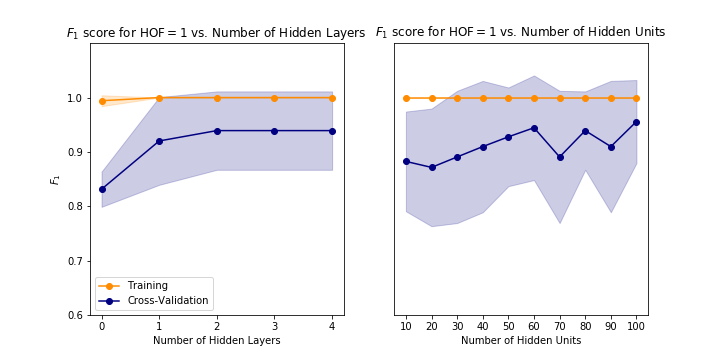

This is not a great surprise, we already had to deal with overfitting with the logistic regression. As an avid NBA fan, I feel that I have a relatively good idea of which players, especially those who are near the end of their careers, will make it into the Hall of Fame. Comparing my intuition to the neural network's prediction, we see some more heuristic signs of overfitting. Some recently retired players, such as Carmelo Anthony, Pau Gasol and Vince Carter, who most NBA enthusiasts consider sure-thing future Hall of Famers, are not predicted to make it, while young talents like Anthony Davis are considered already qualified for HOF status. 

# Conclusion and Future Work

We have presented statistical analysis on the dominating factors for a NBA player to be inducted into Hall of Fame, including data gathering from multiple websites, data cleansing, feature selection, training machine learning models, and making predictions. We find that the dominating factor for Hall of Fame induction is the number of all star games the player has attended, where the player can have more than 50% chance if he has attended at least six all star games, based on logistic regression. The next important factor could be 'VORP,' but the model including this feature shows signs of over-fitting. We also select ten players who are highly probable based on our own impressions but have less than 50% chance to be inducted based on the statistical data till 2018 and the logistic regression models. Among these players, Stephen Curry, Paul George, and Kyrie Irving have just attended their sixth all star game and increase their chance to be over 50%.

The strong correlation between Hall of Fame induction and the number of all star games attended, though surprising, is actually reasonable. As all star game starters are elected via fan voting, the more popular the player is, the more likely he will be voted. Other selections are made by coaches. The all star game is a showcase or exhibition match and is not played very competitively. Therefore, we can see that coaches and fans are incentivized to vote for the most watchable players, not necessarily the most efficient or statistically impressive. While deciding the Hall of Fame inductees, the committees inevitably take the popularity into consideration among other playing statistics.

One interesting direction to move forward is, as the number of all star games attended is almost the sole deciding feature for Hall of Fame induction, to explore dominating factors for a player to be elected into all star game.
Another interesting question is, what are the factors that can compliment the 'AllStar' feature and can make a more accurate predition on the chances of being a Hall of Famer. Some ideas for this are number of commercials, number of magazine appearances, and whether or not the player has a signature sneaker. 

We also explore different machine learning models, specifically Naive Bayes and Neural Network. We find that Naive Bayes tend to have high recall but low presion, setting the classification boundary too deep into the 'HOF' = 0 regime, and Neural Network tends to overfit the data. The neural network CV performance does not exceed that of the simple one-feature logistic regression model by much. We posit that increasing our training data size would allow the neural network to learn more about the data and become a better model for predictions. The Neural Network gains a bit of a predictive edge over the logistic regression at the cost of model interpretability. 

In the future, we would like to apply different machine learning models, such as support vector machines, and compare the results with logistic regression and produce artificial data by executing random rotations in feature space on the existing NBA data.